In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [162]:
columns = ['Date', 'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 
           'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 
           'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 
           'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 
           'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 
           'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 
           'SLP', 'SLP_', 'Precp', 'class']
data = pd.read_csv(r'onehr.csv', delimiter=',', names=columns)
df = pd.DataFrame(data)
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2536 non-null   object 
 2   WSR1    2536 non-null   object 
 3   WSR2    2536 non-null   object 
 4   WSR3    2536 non-null   object 
 5   WSR4    2536 non-null   object 
 6   WSR5    2536 non-null   object 
 7   WSR6    2536 non-null   object 
 8   WSR7    2536 non-null   object 
 9   WSR8    2536 non-null   object 
 10  WSR9    2536 non-null   object 
 11  WSR10   2536 non-null   object 
 12  WSR11   2536 non-null   object 
 13  WSR12   2536 non-null   object 
 14  WSR13   2536 non-null   object 
 15  WSR14   2536 non-null   object 
 16  WSR15   2536 non-null   object 
 17  WSR16   2536 non-null   object 
 18  WSR17   2536 non-null   object 
 19  WSR18   2536 non-null   object 
 20  WSR19   2536 non-null   object 
 21  WSR20   2536 non-null   object 
 22  

In [164]:
df.shape

(2536, 74)

In [165]:
df = df.replace('?', np.nan)
df

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2237 non-null   object 
 2   WSR1    2244 non-null   object 
 3   WSR2    2242 non-null   object 
 4   WSR3    2244 non-null   object 
 5   WSR4    2243 non-null   object 
 6   WSR5    2244 non-null   object 
 7   WSR6    2245 non-null   object 
 8   WSR7    2247 non-null   object 
 9   WSR8    2246 non-null   object 
 10  WSR9    2249 non-null   object 
 11  WSR10   2248 non-null   object 
 12  WSR11   2244 non-null   object 
 13  WSR12   2249 non-null   object 
 14  WSR13   2248 non-null   object 
 15  WSR14   2248 non-null   object 
 16  WSR15   2250 non-null   object 
 17  WSR16   2252 non-null   object 
 18  WSR17   2253 non-null   object 
 19  WSR18   2250 non-null   object 
 20  WSR19   2244 non-null   object 
 21  WSR20   2242 non-null   object 
 22  

In [167]:
df.drop(['Date'], axis=1, inplace=True)
df

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [168]:
df.isna().sum()

WSR0     299
WSR1     292
WSR2     294
WSR3     292
WSR4     293
        ... 
TT       125
SLP       95
SLP_     159
Precp      2
class      0
Length: 73, dtype: int64

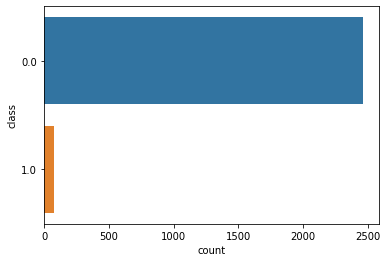

In [169]:
sns.countplot(y=df.iloc[:,72],data=df)

In [170]:
# Since dataset contains values in str format, changing it into float values

for i in df.columns[:-1]:
  df[i] = df[i].astype(str).astype(float)

In [171]:
cols = ['WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 
           'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 
           'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 
           'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 
           'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 
           'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 
           'SLP', 'SLP_', 'Precp', 'class']
for i in cols:
  df[i] = df[i].fillna(df[i].mean())

In [172]:
df.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
TT       0
SLP      0
SLP_     0
Precp    0
class    0
Length: 73, dtype: int64

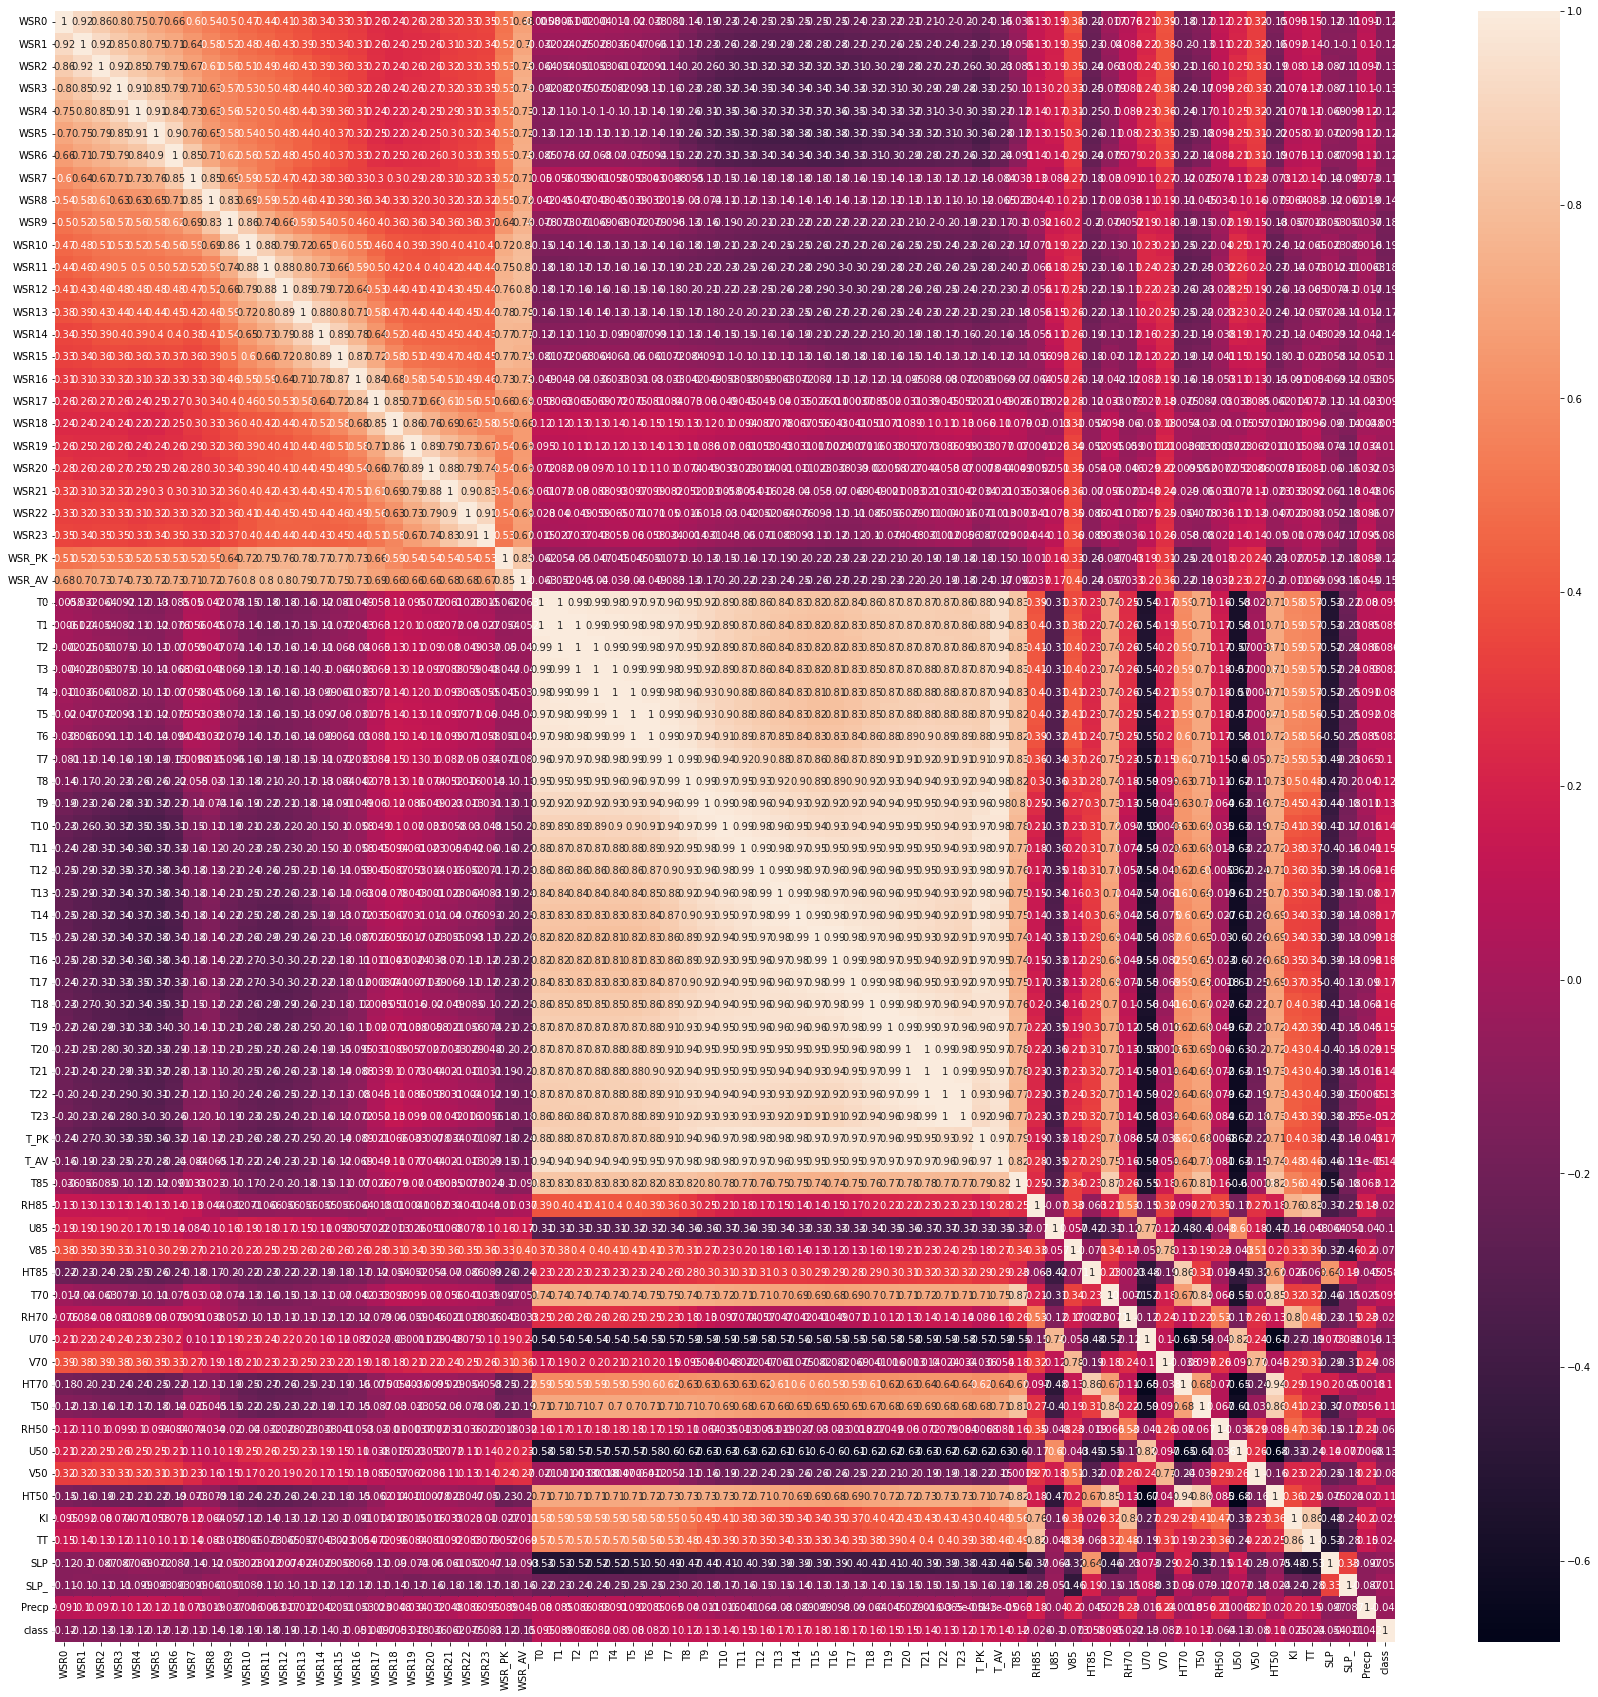

In [173]:
corr=df.corr()
plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True)

In [174]:
X=df.iloc[:,0:72]
Y=df.iloc[:,72]

In [175]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [176]:
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [177]:
pca=PCA(n_components=50)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [178]:
# Fitting Logistic Regression To the training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [179]:
# Predicting the test set result using 
# predict function under LogisticRegression 
Y_pred = classifier.predict(X_test)

In [180]:
# making confusion matrix between
# test set of Y and predicted value.
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[486,   3],
       [ 17,   2]])

In [181]:
accuracy_score(Y_test, Y_pred)

0.9606299212598425